Vertical Expected Shot Map

In [1]:
import pandas as pd
from mplfooty.pitch import VerticalPitch
import matplotlib.patheffects as pe

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

Load Data

In [2]:
df_shots = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/shot_chains_xScore.csv", low_memory=False)
df_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
0,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,0.0,0.0,0.0,Kick,Handball Received,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,26.0,1.0,8.246211,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,False,6,True,0,1,0,0,0,0.377382,0.423225,0.206330,0.374782,0.420309,0.204908,2.669003
1,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,6.0,0.0,6.0,Kick,Handball Received,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,19.0,1.0,7.000000,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,False,53,True,0,0,0,1,0,0.309688,0.365276,0.175964,0.363941,0.429268,0.206791,2.612916
2,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,12.0,0.0,12.0,Kick,Gather,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,21.0,1.0,4.000000,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,False,83,False,0,0,0,1,0,0.362279,0.450421,0.230483,0.347282,0.431775,0.220943,2.515469
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698


In [3]:
df_shots[['Score', 'xScore']].sum()

Score     66630.000000
xScore    65928.112271
dtype: float64

Plot Expected Score per Team

In [4]:
def get_venue_dimensions(chain_data, match_id):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]

    return list(set(match['Venue_Length']))[0], list(set(match['Venue_Width']))[0]

In [5]:
def get_teams(chain_data, match_id):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
 
    # Get teams
    home_team = list(set(match['Home_Team']))[0]
    away_team = list(set(match['Away_Team']))[0]
    
    return home_team, away_team

In [6]:
def get_match_shots(chain_data, match_id, team):
    
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    # Home direction (attacking right)
    home_team = list(set(match['Home_Team']))[0]
    if (team != home_team):
        x = team_shots['x']
        y = team_shots['y']
    else:
        x = -1*team_shots['x']
        y = -1*team_shots['y']
    
    return x, y

In [7]:
def get_match_score(chain_data, match_id, team):
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    score = team_shots['Score']
    
    return score

In [8]:
def get_match_expected_score(chain_data, match_id, team):
    # Get match chain information
    match = chain_data[chain_data['Match_ID'] == match_id]
    
    # Filter Shots
    shots = match[match['Shot_At_Goal'] == True]
    team_shots = shots[shots['Team'] == team]
    
    expected_score = team_shots['xScore']
    
    return expected_score

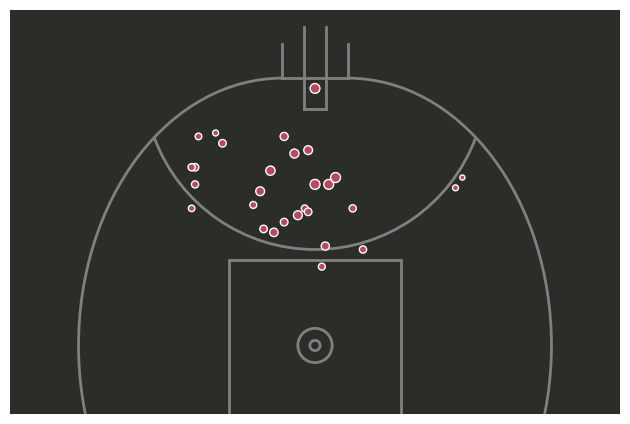

In [21]:
match_id = "202101_BrisbaneLions_Sydney"
pitch_length, pitch_width = get_venue_dimensions(df_shots, match_id)
home_team, away_team = get_teams(df_shots, match_id)
x, y = get_match_shots(df_shots, match_id, team=away_team)
score = get_match_score(df_shots, match_id, team=away_team)
expected_score = get_match_expected_score(df_shots, match_id, team=away_team)

size_ratio = 10

pitch = VerticalPitch(pitch_width=pitch_width, pitch_length=pitch_length, line_colour="grey", half = True)
fig, ax = pitch.draw()
ax.set_facecolor("#2b2e28")
pitch.scatter(x, y, ax=ax, ec="white", color = "#ba495c", s=expected_score*size_ratio)
